# Food Order forcasting

## Loading All Needed Libraries

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection Libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

#Preprocessing Libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Liner Model Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.decomposition

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get dataset

In [3]:
# !wget https://raw.githubusercontent.com/dasarpai/DAI-Datasets/main/food_deman_forcast.zip

In [4]:
# !unzip /content/food_deman_forcast.zip

In [5]:
df_fc = pd.read_csv("fulfilment_center_info.csv")
print(df_fc.shape)
df_fc.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df_meal = pd.read_csv("meal_info.csv")
print(df_meal.shape)
df_meal.head()

(51, 3)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df_train = pd.read_csv("train.csv") #food Demand
print(df_train.shape)
df_train.head()

(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
#no null value in dataset
np.where( np.isnan( df_train.select_dtypes(["int64","float64"]) ))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df_train.shape

(456548, 9)

In [10]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [12]:
df_demand_all = df_train.merge(df_fc, on="center_id", how="left",)
df_demand_all = df_demand_all.merge(df_meal, on="meal_id", how = "left")
df_demand_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [13]:
# prompt: in df_demand_all id is index

df_demand_all = df_demand_all.set_index('id')

In [14]:
# Check the shape and info of the merged dataframe
print(df_demand_all.shape)
df_demand_all.info()

(456548, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 1379560 to 1361984
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   city_code              456548 non-null  int64  
 9   region_code            456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
dtypes: float64(3), int64(

In [15]:
# Summary statistics
print(df_demand_all.describe())

                week      center_id        meal_id  checkout_price  \
count  456548.000000  456548.000000  456548.000000   456548.000000   
mean       74.768771      82.105796    2024.337458      332.238933   
std        41.524956      45.975046     547.420920      152.939723   
min         1.000000      10.000000    1062.000000        2.970000   
25%        39.000000      43.000000    1558.000000      228.950000   
50%        76.000000      76.000000    1993.000000      296.820000   
75%       111.000000     110.000000    2539.000000      445.230000   
max       145.000000     186.000000    2956.000000      866.270000   

          base_price  emailer_for_promotion  homepage_featured     num_orders  \
count  456548.000000          456548.000000       456548.00000  456548.000000   
mean      354.156627               0.081152            0.10920     261.872760   
std       160.715914               0.273069            0.31189     395.922798   
min        55.350000               0.000000  

In [16]:
# Check for missing values
print(df_demand_all.isnull().sum())

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64


In [17]:
# Explore categorical features
for col in df_demand_all.select_dtypes(include=['object', 'category']):
    print(f"\nColumn: {col}")
    print(df_demand_all[col].value_counts())


Column: center_type
center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: count, dtype: int64

Column: category
category
Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: count, dtype: int64

Column: cuisine
cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: count, dtype: int64


## EDA

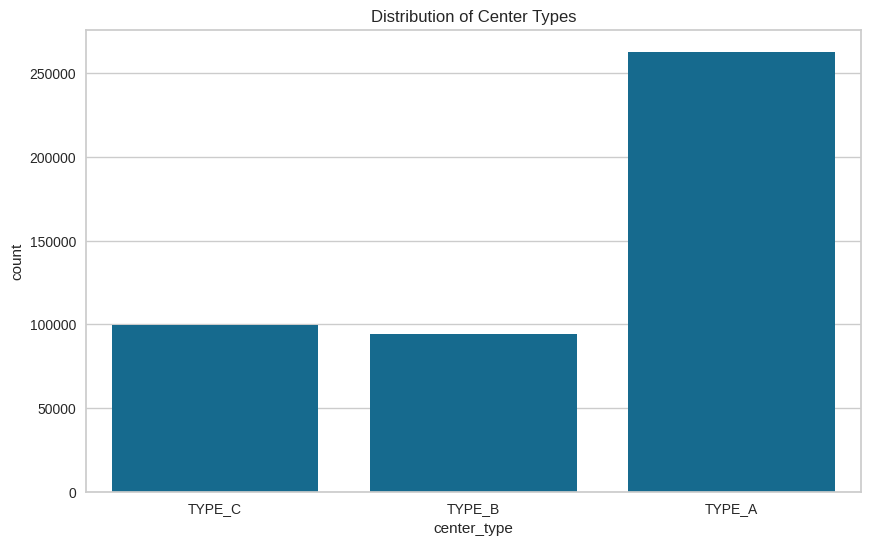

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='center_type', data=df_demand_all)
plt.title('Distribution of Center Types')
plt.show()

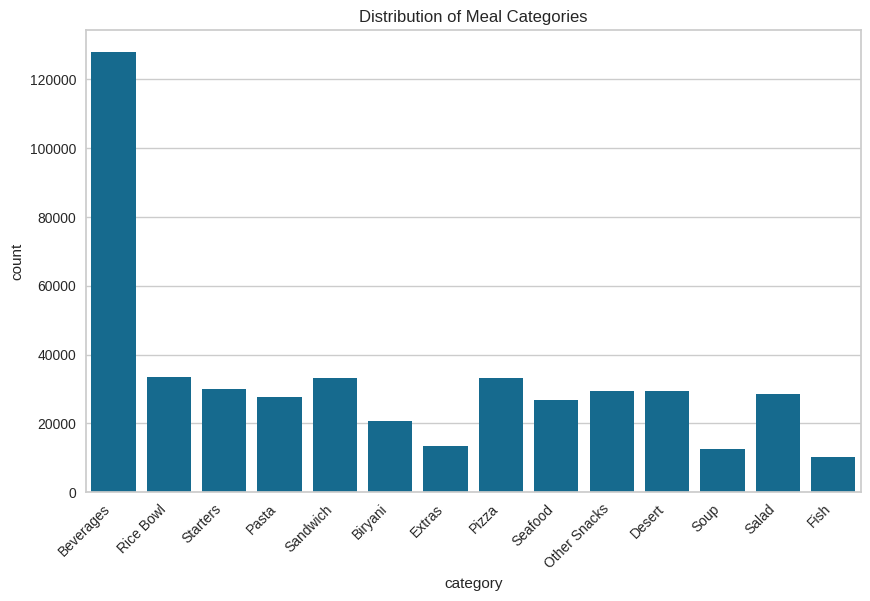

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df_demand_all)
plt.title('Distribution of Meal Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

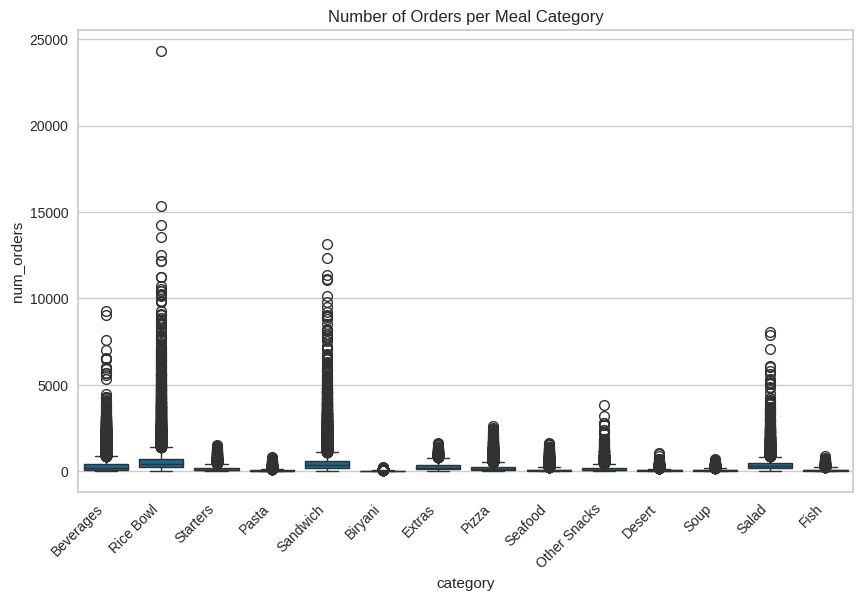

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='num_orders', data=df_demand_all)
plt.title('Number of Orders per Meal Category')
plt.xticks(rotation=45, ha='right')
plt.show()

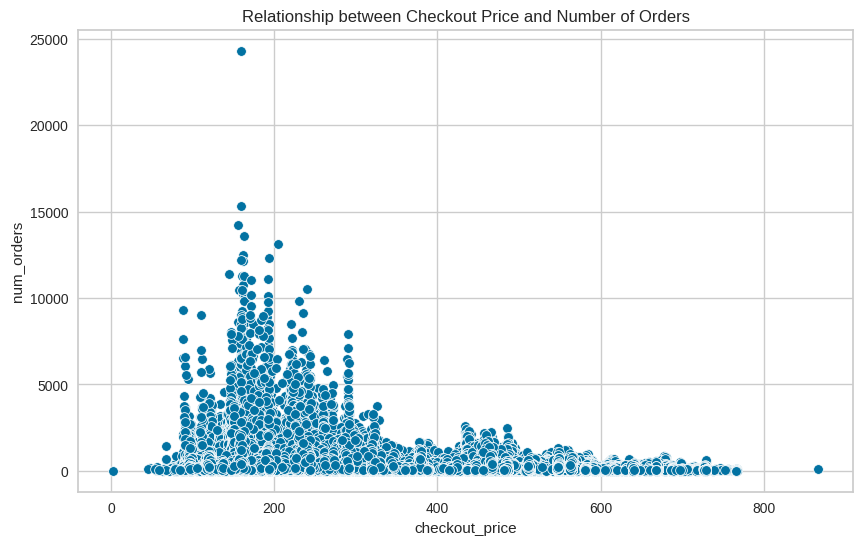

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='checkout_price', y='num_orders', data=df_demand_all)
plt.title('Relationship between Checkout Price and Number of Orders')
plt.show()

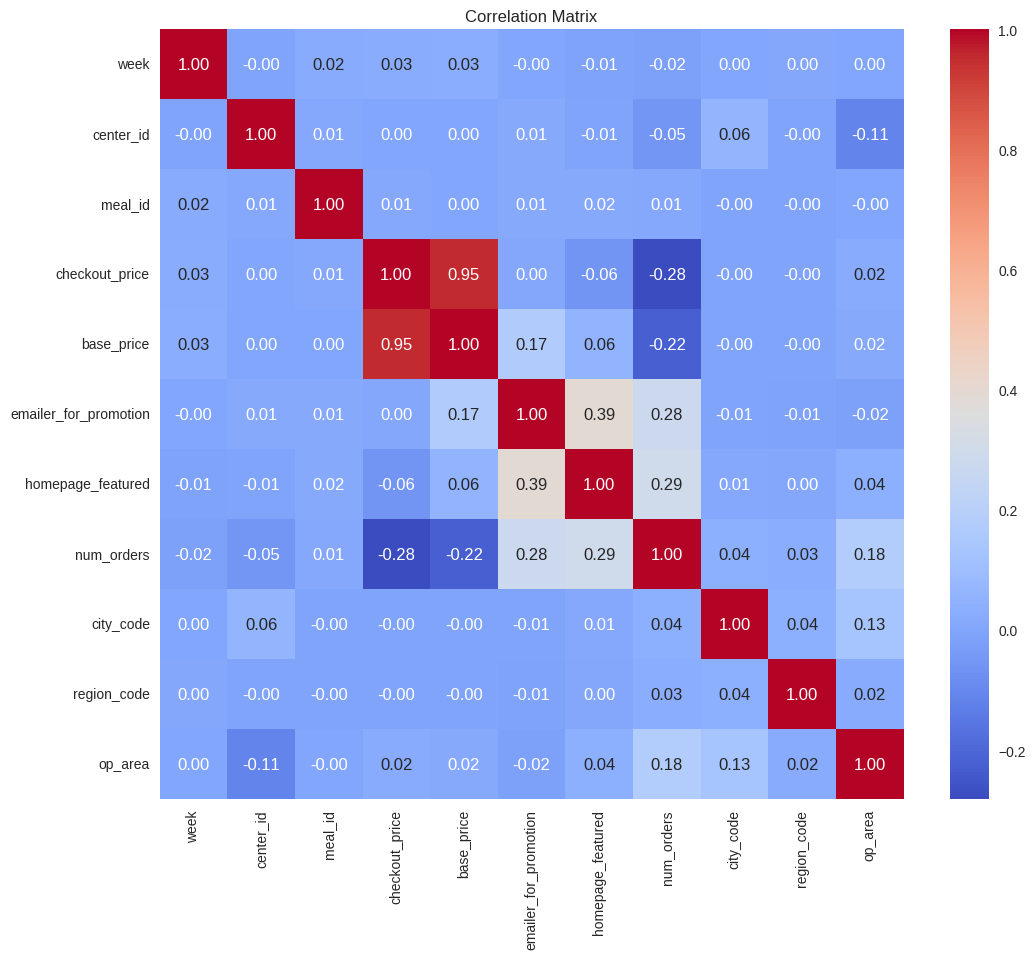

In [22]:
# Correlation matrix (for numerical features)
# Select only numerical features for correlation analysis
numerical_features = df_demand_all.select_dtypes(include=['number']).columns
correlation_matrix = df_demand_all[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

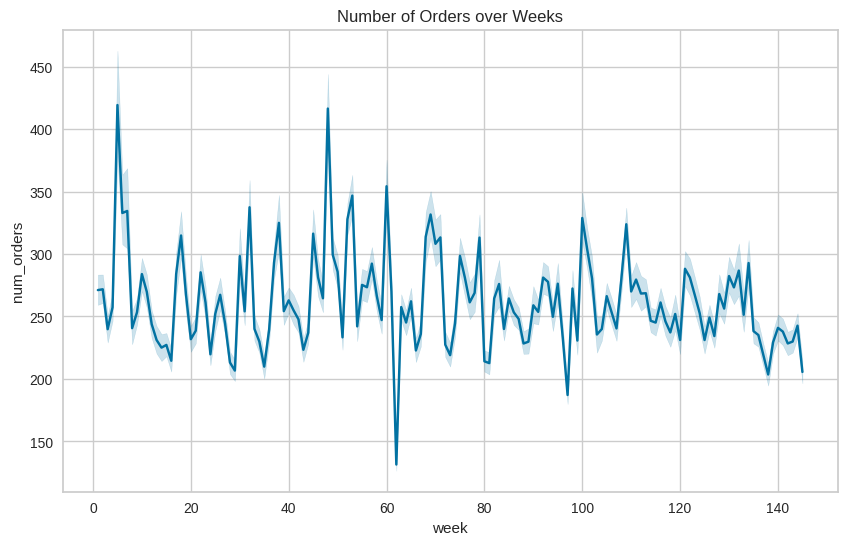

In [23]:
# Analyze 'week' column
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='num_orders', data=df_demand_all)
plt.title('Number of Orders over Weeks')
plt.show()

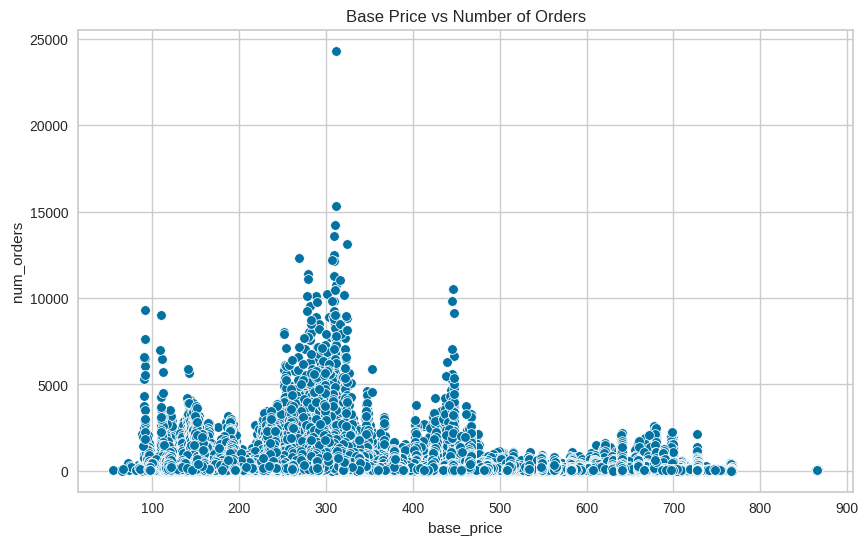

In [24]:
# Analyze 'base_price' vs 'num_orders'
plt.figure(figsize=(10,6))
sns.scatterplot(x='base_price', y='num_orders', data=df_demand_all)
plt.title("Base Price vs Number of Orders")
plt.show()

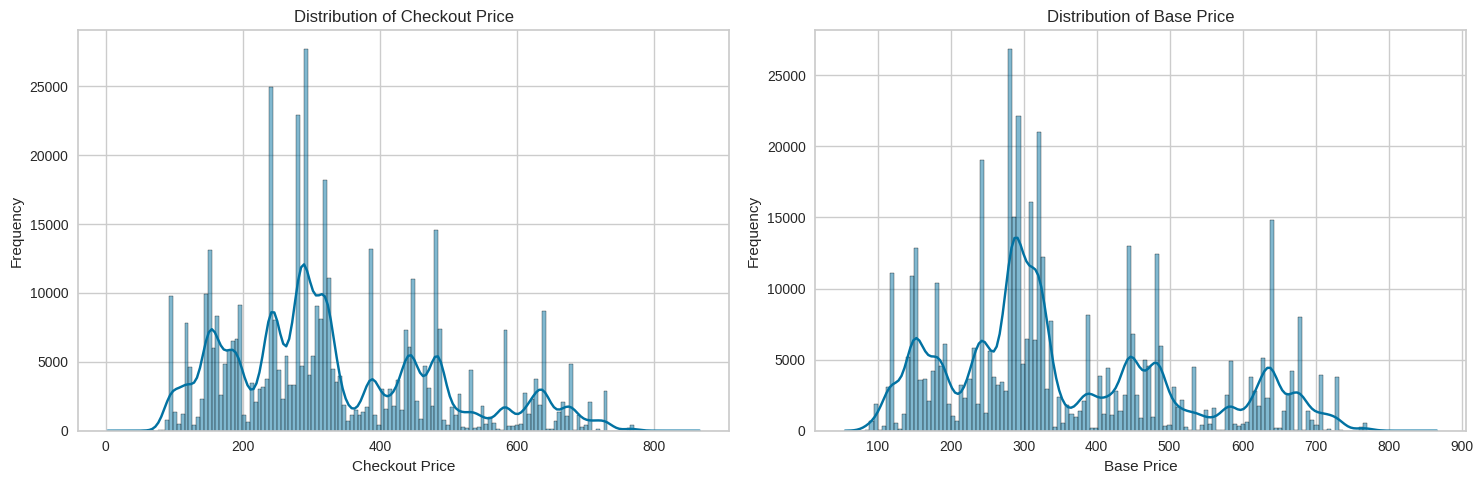

In [25]:
# prompt: distribution of checkout_price, base_price in 2 subplots

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of checkout_price
sns.histplot(df_demand_all['checkout_price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Checkout Price')
axes[0].set_xlabel('Checkout Price')
axes[0].set_ylabel('Frequency')


# Distribution of base_price
sns.histplot(df_demand_all['base_price'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Base Price')
axes[1].set_xlabel('Base Price')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Feature Engineering

In [26]:
# Convert 'center_id', 'meal_id', and 'week' to categorical features
df_demand_all['center_id'] = df_demand_all['center_id'].astype('category')
df_demand_all['meal_id'] = df_demand_all['meal_id'].astype('category')
# df_demand_all['week'] = df_demand_all['week'].astype('category')

# One-hot encode categorical features
df_demand_all = pd.get_dummies(df_demand_all, columns=['center_id', 'meal_id' ,'center_type', 'category', 'cuisine'], drop_first=True)


# Create interaction features
df_demand_all['price_diff'] = df_demand_all['checkout_price'] - df_demand_all['base_price']
df_demand_all['price_ratio'] = df_demand_all['checkout_price'] / df_demand_all['base_price']

In [27]:
# Log transformation of numerical features
for col in ['checkout_price', 'base_price', 'num_orders']:
    df_demand_all[f'log_{col}'] = np.log1p(df_demand_all[col]) # Use log1p for non-positive values

In [28]:
df_demand_all

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_id_11,...,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,price_diff,price_ratio,log_checkout_price,log_base_price,log_num_orders
id,,,,,,,,,,,,,,,,,,,,,
1379560,1,136.83,152.29,0,0,177,647,56,2.0,False,...,False,False,False,False,True,-15.46,0.898483,4.926021,5.032332,5.181784
1466964,1,136.83,135.83,0,0,270,647,56,2.0,False,...,False,False,False,False,True,1.00,1.007362,4.926021,4.918739,5.602119
1346989,1,134.86,135.86,0,0,189,647,56,2.0,False,...,False,False,False,False,True,-1.00,0.992639,4.911625,4.918959,5.247024
1338232,1,339.50,437.53,0,0,54,647,56,2.0,False,...,False,False,True,False,False,-98.03,0.775947,5.830415,6.083428,4.007333
1448490,1,243.50,242.50,0,0,40,647,56,2.0,False,...,False,False,True,False,False,1.00,1.004124,5.499215,5.495117,3.713572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271326,145,484.09,484.09,0,0,68,473,77,4.5,False,...,False,False,True,False,False,0.00,1.000000,6.184334,6.184334,4.234107
1062036,145,482.09,482.09,0,0,42,473,77,4.5,False,...,False,False,True,False,False,0.00,1.000000,6.180203,6.180203,3.761200
1110849,145,237.68,321.07,0,0,501,473,77,4.5,False,...,False,False,False,True,False,-83.39,0.740275,5.475124,5.774769,6.218600


In [29]:
#Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df_demand_all[['checkout_price', 'base_price']])
poly_features = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['checkout_price', 'base_price']))

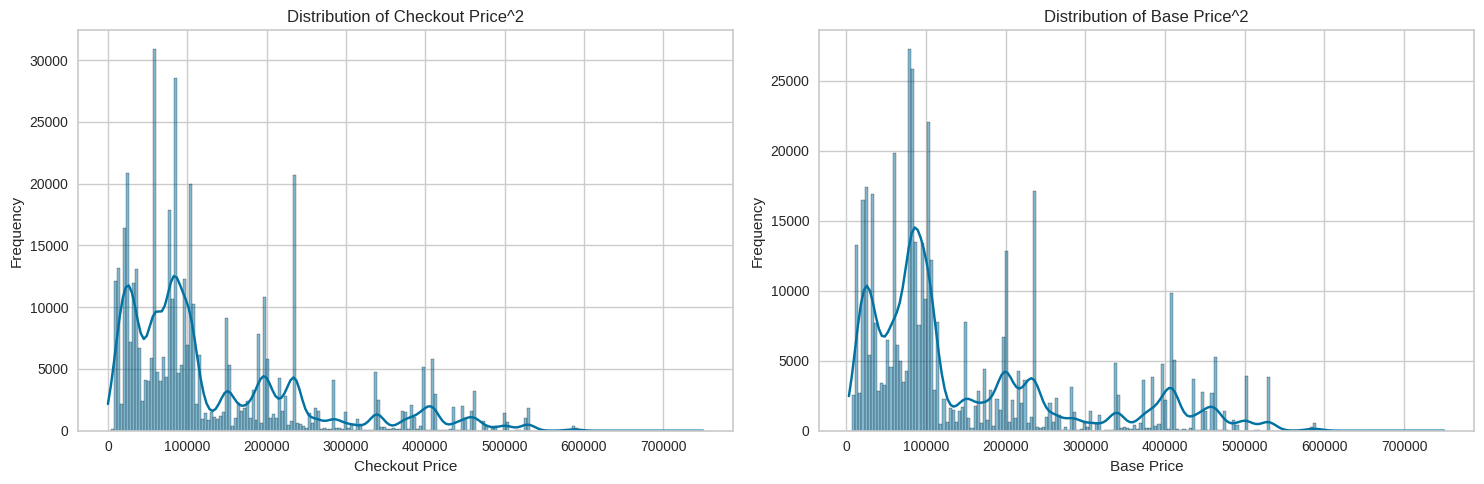

In [30]:
# prompt: distribution of checkout_price, base_price in 2 subplots

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of checkout_price
sns.histplot(poly_features['checkout_price^2'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Checkout Price^2')
axes[0].set_xlabel('Checkout Price')
axes[0].set_ylabel('Frequency')


# Distribution of base_price
sns.histplot(poly_features['base_price^2'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Base Price^2')
axes[1].set_xlabel('Base Price')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [31]:
# prompt: create log10 based features using checkout_price, base_price
log_features = pd.DataFrame()
# Log transformation of numerical features
for col in ['checkout_price', 'base_price']:
    log_features[f'log10_{col}'] = np.log10(df_demand_all[col] + 1) # Use log1p for non-positive values

In [32]:
log_features

,log10_checkout_price,log10_base_price
id,,
1379560,2.139344,2.185514
1466964,2.139344,2.136181
1346989,2.133092,2.136277
1338232,2.532117,2.641999
1448490,2.388279,2.386499
...,...,...
1271326,2.685822,2.685822
1062036,2.684028,2.684028
1110849,2.377816,2.507950


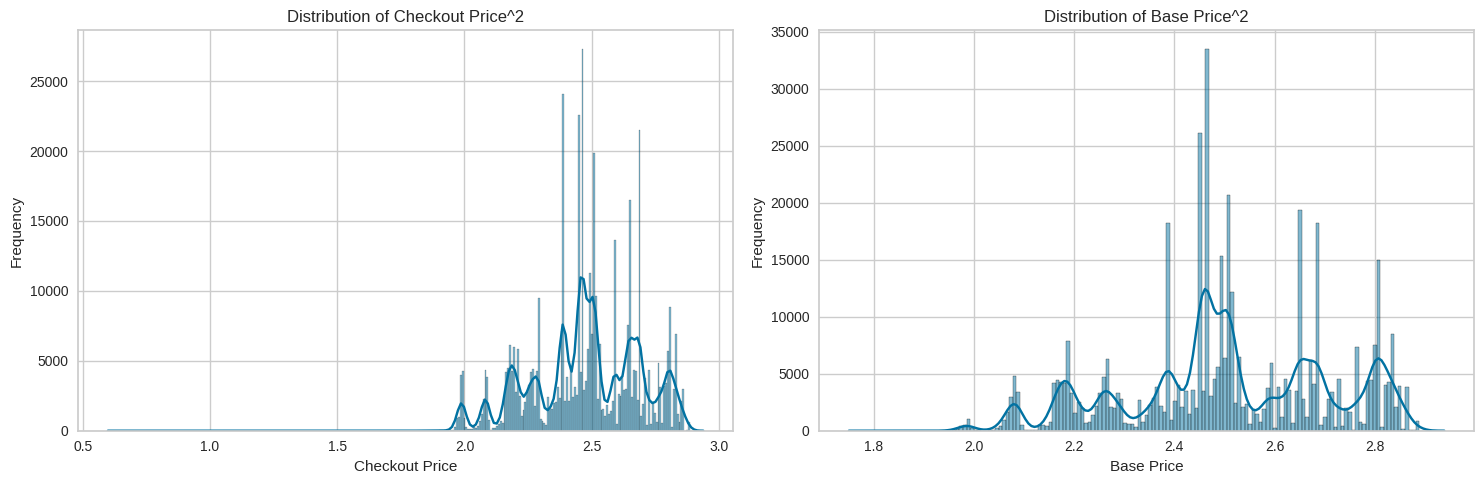

In [33]:
# prompt: distribution of checkout_price, base_price in 2 subplots

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of checkout_price
sns.histplot(log_features['log10_checkout_price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Checkout Price^2')
axes[0].set_xlabel('Checkout Price')
axes[0].set_ylabel('Frequency')


# Distribution of base_price
sns.histplot(log_features['log10_base_price'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Base Price^2')
axes[1].set_xlabel('Base Price')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
# add these features to dataset
# Log transformation of numerical features
for col in ['checkout_price', 'base_price']:
    df_demand_all[f'log10_{col}'] = np.log10(df_demand_all[col] + 1) # Use log1p for non-positive values

In [35]:
# prompt: drop ['checkout_price', 'base_price']

df_demand_all = df_demand_all.drop(['checkout_price', 'base_price'], axis=1)

In [36]:
df_demand_all.shape

(456548, 158)

In [37]:
df_demand_all.describe()

,week,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,price_diff,price_ratio,log_checkout_price,log_base_price,log_num_orders,log10_checkout_price,log10_base_price
count,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,-21.917695,0.942805,5.699188,5.766833,4.888190,2.475126,2.504504
std,41.524956,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,48.495857,0.113628,0.481027,0.470143,1.203166,0.208907,0.204180
min,1.000000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,-561.600000,0.009391,1.378766,4.031582,2.639057,0.598791,1.750894
25%,39.000000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000,-16.520000,0.937579,5.437862,5.499215,4.007333,2.361633,2.388279
50%,76.000000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,-1.000000,0.998588,5.696489,5.741271,4.919981,2.473954,2.493402
75%,111.000000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000,1.000000,1.001454,6.100835,6.130944,5.783825,2.649559,2.662635
max,145.000000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,185.300000,1.727898,6.765350,6.765350,10.098232,2.938154,2.938154


In [38]:
# !pip install pycaret

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_demand_all.drop(columns=['num_orders'])
y = df_demand_all['num_orders']

selector = SelectKBest(score_func=f_classif, k=30)  # Select top 20 features
X_new = selector.fit_transform(X, y)

# Convert the selected features back into a DataFrame (optional, for better readability)
selected_feature_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_feature_indices])
X_new = pd.DataFrame(X_new, columns=selected_features)

In [40]:
X_new.index = df_demand_all.index

In [41]:
# prompt: X is dataframe and y is series. You need to concate them into df_demand_all1

df_demand_all1 = pd.concat([X_new, y], axis=1)

In [42]:
df_demand_all1

,emailer_for_promotion,homepage_featured,op_area,center_id_13,meal_id_1109,meal_id_1247,meal_id_1754,meal_id_1770,meal_id_1885,meal_id_1902,...,category_Seafood,cuisine_Indian,cuisine_Italian,price_diff,price_ratio,log_checkout_price,log_base_price,log10_checkout_price,log10_base_price,num_orders
id,,,,,,,,,,,,,,,,,,,,,
1379560,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-15.46,0.898483,4.926021,5.032332,2.139344,2.185514,177
1466964,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,1.007362,4.926021,4.918739,2.139344,2.136181,270
1346989,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.00,0.992639,4.911625,4.918959,2.133092,2.136277,189
1338232,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-98.03,0.775947,5.830415,6.083428,2.532117,2.641999,54
1448490,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.00,1.004124,5.499215,5.495117,2.388279,2.386499,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271326,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.00,1.000000,6.184334,6.184334,2.685822,2.685822,68
1062036,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.00,1.000000,6.180203,6.180203,2.684028,2.684028,42
1110849,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-83.39,0.740275,5.475124,5.774769,2.377816,2.507950,501


In [43]:
# prompt: pycaret is taking to much time. How to reduce the time?

from pycaret.regression import *

# ... (your existing code) ...

# Instead of using setup() with all the data, create a smaller sample for faster processing
sample_size = 100000 # Adjust the sample size as needed
df_sample = df_demand_all1.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

# Setup PyCaret with the sample
reg = setup(data=df_sample, target='num_orders', session_id=123,
            normalize=True,  # Normalize your data
            transformation=True, # Apply transformations
            ignore_features=['log_num_orders'], # Ignore certain features if they are causing slowdowns.
            numeric_imputation='mean', # Handle missing numerical values efficiently
            categorical_imputation='mode')

# Compare models on the smaller dataset
best_model = compare_models()

# If you need to evaluate on the full dataset, train the best model on a larger sample
# Or use the best model from compare_models and train it on the full data


# ... (rest of your code)

,Description,Value
0,Session id,123
1,Target,num_orders
2,Target type,Regression
3,Original data shape,"(100000, 31)"
4,Transformed data shape,"(100000, 31)"
5,Transformed train set shape,"(70000, 31)"
6,Transformed test set shape,"(30000, 31)"
7,Ignore features,1
8,Numeric features,30
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,102.8896,41666.7912,203.6165,0.7249,0.6870,0.8043,3.3700
lightgbm,Light Gradient Boosting Machine,106.7507,42390.6227,205.6073,0.7192,0.7123,0.8757,5.2430
rf,Random Forest Regressor,104.4610,44436.0502,210.3359,0.7058,0.6650,0.7519,44.9470
et,Extra Trees Regressor,108.4783,47359.3323,217.2690,0.6859,0.6939,0.7607,26.8290
knn,K Neighbors Regressor,109.2702,50620.3576,224.7541,0.6642,0.6839,0.7763,5.4100
gbr,Gradient Boosting Regressor,120.8355,51999.7814,227.6428,0.6561,0.7952,1.0427,13.3330
dt,Decision Tree Regressor,126.5625,73180.2084,269.9385,0.5161,0.7751,0.8213,3.1550
lr,Linear Regression,157.9793,81851.6157,285.5787,0.4592,1.0504,1.4937,3.1950
ridge,Ridge Regression,158.5460,83753.1695,288.8588,0.4468,1.0195,1.5025,2.5270
br,Bayesian Ridge,158.5111,83771.8286,288.8902,0.4467,1.0213,1.5018,2.7010


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [44]:
# Tune the best model (optional)
tuned_model = tune_model(best_model)

# Evaluate the model (optional)
evaluate_model(tuned_model)

# Finalize the model
final_model = finalize_model(tuned_model)

# Predict on new data (replace 'new_data' with your actual data)
# predictions = predict_model(final_model, data=new_data)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,103.0957,35679.2495,188.8895,0.7467,0.6928,0.8267
1,102.8934,40940.7415,202.3382,0.7456,0.6797,0.8084
2,105.8037,50482.4675,224.6830,0.7200,0.6897,0.8303
3,101.1853,40987.8709,202.4546,0.7258,0.6825,0.8118
4,106.3073,46111.2133,214.7352,0.7183,0.6918,0.8366
5,106.1123,42037.6243,205.0308,0.7142,0.7002,0.8502
6,100.7860,33957.8562,184.2766,0.7375,0.6951,0.8370
7,102.7004,41212.8437,203.0095,0.7131,0.6830,0.8294
8,104.6571,46771.2280,216.2666,0.6958,0.6820,0.8052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
# prompt: how to know the accuracy of the best model?

from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code) ...

# After finalizing the model:
predictions = predict_model(final_model, data=df_sample) # Predict on the sample used for comparison

# Evaluate the model's accuracy using relevant metrics
rmse = mean_squared_error(df_sample['num_orders'], predictions['num_orders'], squared=False)
r_squared = r2_score(df_sample['num_orders'], predictions['num_orders'])

print(f"RMSE of the best model on the sample dataset: {rmse}")
print(f"R-squared of the best model on the sample dataset: {r_squared}")

# For a more robust evaluation, predict on a held-out test set (if available)
# Or, use cross-validation with the full dataset to get more reliable performance metrics
# Example using cross-validation (replace 'final_model' with your model object):
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(final_model, X, y, cv=5, scoring='neg_root_mean_squared_error') # Example for RMSE
# print(f"Cross-validated RMSE scores: {-scores}") # Note the negative sign for RMSE
# print(f"Mean Cross-validated RMSE: {-scores.mean()}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,91.7894,25818.4951,160.6813,0.8299,0.6593,0.7781


RMSE of the best model on the sample dataset: 0.0
R-squared of the best model on the sample dataset: 1.0
